# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils # np_utils.to_categorical: OneHotEncoding
import numpy as np
np.random.seed(10)

Using TensorFlow backend.
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [2]:
#載入手寫辨識的資料集
from keras .datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

11493376/11490434 [==============================] - 280s 24us/step


In [3]:
x_train_image.shape, y_train_label.shape

((60000, 28, 28), (60000,))

In [4]:
x_test_image.shape, y_test_label.shape

((10000, 28, 28), (10000,))

In [8]:
#指定測試集與訓練資料集
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [9]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [10]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
#建立模型
model = Sequential() #宣告採用序列模型
model.add(Dense(units=256, #輸入層
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))
model.add(Dense(units=256,
               kernel_initializer='normal',
               activation='relu'))
model.add(Dense(units=256,
               kernel_initializer='normal',
               activation='relu'))
model.add(Dense(units=10, #輸出層
               kernel_initializer='normal',
               activation='softmax'))

In [23]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [24]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [25]:
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,
                         validation_split=0.2,
                         epochs=10,
                         batch_size=32,
                         verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 29s 609us/step - loss: 0.2355 - accuracy: 0.9286 - val_loss: 0.1081 - val_accuracy: 0.9670
Epoch 2/10
48000/48000 [==============================] - 27s 560us/step - loss: 0.0982 - accuracy: 0.9696 - val_loss: 0.1071 - val_accuracy: 0.9693
Epoch 3/10
48000/48000 [==============================] - 28s 575us/step - loss: 0.0693 - accuracy: 0.9789 - val_loss: 0.0950 - val_accuracy: 0.9741
Epoch 4/10
48000/48000 [==============================] - 27s 561us/step - loss: 0.0530 - accuracy: 0.9833 - val_loss: 0.0959 - val_accuracy: 0.9749
Epoch 5/10
48000/48000 [==============================] - 27s 561us/step - loss: 0.0442 - accuracy: 0.9855 - val_loss: 0.0919 - val_accuracy: 0.9767
Epoch 6/10
48000/48000 [==============================] - 27s 557us/step - loss: 0.0377 - accuracy: 0.9886 - val_loss: 0.1129 - val_accuracy: 0.9718
Epoch 7/

# 以圖形顯示訓練過程

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [37]:
train_history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

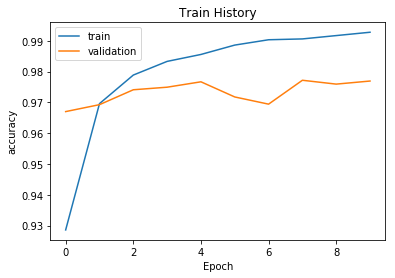

In [35]:
show_train_history(train_history,'accuracy','val_accuracy')

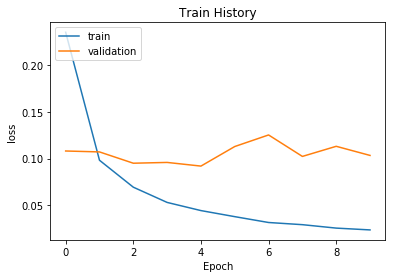

In [29]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [31]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 178us/step

accuracy= 0.9801999926567078
